In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # 決定木分析(回帰)を行うためのクラス
from sklearn.model_selection import train_test_split

# diabetes
diabetes = datasets.load_diabetes()
# 辞書型の変数からDataFrameを作成
df = pd.DataFrame(data = diabetes['data'], columns=diabetes['feature_names'])
df['target'] = diabetes['target']

features = df.columns[:-1] # 最後のカラム以外を特徴量とする
# 特徴量とターゲットを取得
X = df[features].values 
y = df['target']

In [2]:
# 訓練データをテスト(検証)データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
# 決定木を用いて学習
DTR = DecisionTreeRegressor(max_depth=2, random_state=0)
DTR = DTR.fit(X_train, y_train)

In [4]:
# 特徴量の重要度の確認
# 識別境界で境界が描画されていく順番, 特徴量の重要度
# 1に近いほど重要, 1ならそれだけで分類可能
DTR.feature_importances_

array([0.        , 0.        , 0.66259585, 0.14948378, 0.        ,
       0.        , 0.        , 0.        , 0.18792038, 0.        ])

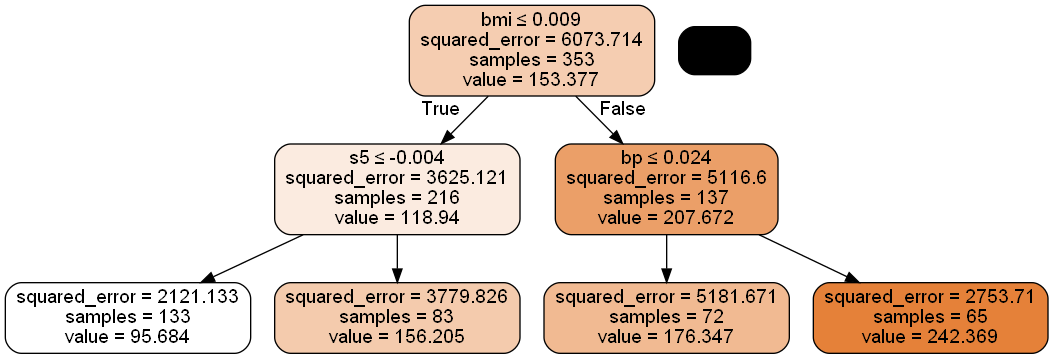

In [5]:
# 参考
# 決定木の可視化
from sklearn.tree import export_graphviz  # 決定木を可視化するための関数
import pydotplus  # dot形式の描画用データを画像に変換
from IPython.display import Image  # 画像を表示するための関数
dot_data = export_graphviz(DTR,  # 決定木オブジェクトを一つ指定する
                           out_file=None,  # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                           filled=True,  # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                           rounded=True,  # Trueにすると、ノードの角を丸く描画する。
                           feature_names=features,  # これを指定しないとチャート上で特徴量の名前が表示されない
                           label='all',
                           special_characters=True  # 特殊文字を扱えるようにする
                          )
graph = pydotplus.graph_from_dot_data(dot_data)  # dotファイルを画像に変換
Image(graph.create_png())  # 画像を表示

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred = DTR.predict(X_train) # 訓練データの予測値
y_test_pred = DTR.predict(X_test) # テストデータの予測値

# 平均平方二乗誤差(RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
print(f'RMSE 訓練: {rmse_train:.2f}, テスト： {rmse_test:.2f}')

# 決定係数(R^2)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R^2 訓練：{r2_train:.4f}, テスト：{r2_test:.4f}')

RMSE 訓練: 3251.86, テスト： 4090.78
R^2 訓練：0.4646, テスト：0.2324
